In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow_model_optimization as tfmot

from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

In [3]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_nfl_players_stats

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08


In [5]:
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)

df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)

df_nfl_players_stats.drop(columns=["game_date"], inplace=True)

df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

In [6]:
y_data = np.asarray(df_nfl_players_stats["pass_cmp"])

In [7]:
df_nfl_players_stats.drop(columns=["pass_cmp"], inplace=True)

In [8]:
df_nfl_players_stats[df_nfl_players_stats["pos"]=="QB"]

,game_id,player_id,pos,player,team,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,30,203,1,0,5,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,45,228,0,1,5,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,39,186,1,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,38,239,0,1,3,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,24,248,3,0,4,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,18,180,1,2,3,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,20,178,3,0,4,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,37,128,1,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,1,0,0,0,0,...,0,0,6,9,6,26,False,42,53,7


In [9]:
df_nfl_players_stats.shape

(26600, 58)

In [10]:
df_nfl_players_stats.iloc[:,5:]

,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,rush_yds,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,30,203,1,0,5,37,47,91.4,3,8,...,0,0,61,100,10,3,False,65,69,10
1,0,0,0,0,0,0,0,0.0,13,39,...,1,0,37,61,10,3,False,65,69,10
2,0,0,0,0,0,0,0,0.0,1,0,...,2,0,41,67,10,3,False,65,69,10
3,0,0,0,0,0,0,0,0.0,0,0,...,19,0,59,97,10,3,False,65,69,10
4,0,0,0,0,0,0,0,0.0,0,0,...,17,0,33,54,10,3,False,65,69,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,0,0,0,0,0,0,0,0.0,0,0,...,6,0,46,70,6,26,False,42,53,7
26596,0,0,0,0,0,0,0,0.0,0,0,...,0,0,12,18,6,26,False,42,53,7
26597,0,0,0,0,0,0,0,0.0,1,-4,...,1,0,35,53,6,26,False,42,53,7
26598,0,0,0,0,0,0,0,0.0,3,8,...,0,0,3,5,6,26,False,42,53,7


In [11]:
X_k = np.asarray(df_nfl_players_stats.iloc[:,5:]).astype(np.float32)
X_k = X_k.reshape(X_k.shape[0], -1)

In [12]:
inputs  = (56,)

In [13]:
X_k.shape[1]

53

In [14]:
ymax = y_data.max()
ymin = y_data.min()

In [15]:
#for i in range(0,len(y_data)):
#    y_data[i] = (y_data[i] - y_data.min()) / (y_data.max() - y_data.min())

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_k, y_data, test_size=.2)

In [17]:
from keras.layers import Dense

In [18]:
model = tf.keras.Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=32, input_dim=X_k.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=16, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(Xtrain, ytrain ,batch_size = 10, epochs = 25, verbose=1)

Epoch 1/25
2128/2128 [==============================] - 2s 626us/step - loss: 15.7851
Epoch 2/25
2128/2128 [==============================] - 1s 606us/step - loss: 2.4900
Epoch 3/25
2128/2128 [==============================] - 1s 642us/step - loss: 1.3656
Epoch 4/25
2128/2128 [==============================] - 1s 596us/step - loss: 1.0082
Epoch 5/25
2128/2128 [==============================] - 1s 588us/step - loss: 0.8653
Epoch 6/25
2128/2128 [==============================] - 1s 587us/step - loss: 0.8081
Epoch 7/25
2128/2128 [==============================] - 1s 595us/step - loss: 0.8125
Epoch 8/25
2128/2128 [==============================] - 1s 586us/step - loss: 0.8260
Epoch 9/25
2128/2128 [==============================] - 1s 584us/step - loss: 0.8090
Epoch 10/25
2128/2128 [==============================] - 1s 598us/step - loss: 0.8702
Epoch 11/25
2128/2128 [==============================] - 1s 601us/step - loss: 0.7876
Epoch 12/25
2128/2128 [==============================] - 1s 59

In [19]:
Xtrain.shape

(21280, 53)

In [20]:
ypred = model.predict(Xtest)

In [21]:
Xtest[500]

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  2. ,  1. ,  9. ,  0. ,  9. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.9,  1.9,  1.4,  1.4,
        1.4,  1.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 14. ,  1. ,
        0. , 16. , 25. , 41. , 38. ,  0. , 72. , 45. ,  0. ],
      dtype=float32)

In [22]:
Xtest[:,0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [23]:
ypred

array([[ 0.00879192],
       [-0.07498002],
       [ 0.00329566],
       ...,
       [ 0.11845016],
       [-0.09785485],
       [-0.0568049 ]], dtype=float32)

In [24]:
import math

In [25]:
#y_val = []
#for i in ypred:
#    i = math.floor(i)
#    y_val.append(i)

In [26]:
y_val =[math.floor(i) for i in ypred]

In [27]:
y_val[500]

-1

In [28]:
model.evaluate(Xtrain, ytrain)

665/665 [==============================] - 0s 500us/step - loss: 0.5839


0.583882212638855

In [29]:
cnf_matrix = confusion_matrix(ytest,y_val)
print(cnf_matrix)
print(classification_report(ytest,y_val))

[[   0    0    0 ...    0    0    0]
 [4487  298    1 ...    0    0    0]
 [   0   18    7 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.06      0.12      4786
           1       0.39      0.24      0.30        29
           2       0.30      0.30      0.30        10
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         3
           5       0.12      0.33      0.18         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        13
          10       0.50      0.25      0.33         4
          11       0.17      0.33      0.22         9
          12   

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [30]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude


epochs = 10


end_step = np.ceil(1.0 * len(Xtrain) / 16).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.8,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = 'acc')

C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


In [32]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]
model_for_pruning.fit(Xtrain, ytrain,batch_size=16,epochs=10, validation_split=.2)

Epoch 1/10
1064/1064 [==============================] - 1s 974us/step - loss: 2.4975 - acc: 0.8193 - val_loss: 2.3364 - val_acc: 0.9039
Epoch 2/10
1064/1064 [==============================] - 1s 896us/step - loss: 1.6883 - acc: 0.9083 - val_loss: 3.3027 - val_acc: 0.9044
Epoch 3/10
1064/1064 [==============================] - 1s 874us/step - loss: 2.0806 - acc: 0.8698 - val_loss: 3.6918 - val_acc: 0.9034
Epoch 4/10
1064/1064 [==============================] - 1s 897us/step - loss: 3.1179 - acc: 0.9091 - val_loss: 3.7451 - val_acc: 0.9027
Epoch 5/10
1064/1064 [==============================] - 1s 866us/step - loss: 2.1617 - acc: 0.8603 - val_loss: 3.0691 - val_acc: 0.9058
Epoch 6/10
1064/1064 [==============================] - 1s 863us/step - loss: 1.9367 - acc: 0.9080 - val_loss: 3.0002 - val_acc: 0.9046
Epoch 7/10
1064/1064 [==============================] - 1s 864us/step - loss: 1.4654 - acc: 0.9080 - val_loss: 2.1624 - val_acc: 0.9053
Epoch 8/10
1064/1064 [==========================

In [33]:
prunned = model_for_pruning.predict(Xtest)

yp_val =[math.floor(i) for i in prunned]

cnf_matrix_p = confusion_matrix(ytest,yp_val)
print(cnf_matrix_p)
print(classification_report(ytest,yp_val))

[[4786    0    0 ...    0    0    0]
 [  22    0    0 ...    0    0    0]
 [  10    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4786
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           4       0.07      0.33      0.11         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       1.00      0.20      0.33         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         9
          12       0.04      0.33      0.08        12
          13   

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import seaborn

<AxesSubplot:>

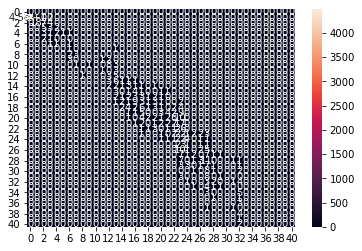

In [35]:
seaborn.heatmap(cnf_matrix, annot=True)

[[4786    0    0 ...    0    0    0]
 [   0   23    5 ...    0    0    0]
 [   0    1    8 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4786
           1       0.96      0.79      0.87        29
           2       0.53      0.80      0.64        10
           3       0.55      0.75      0.63         8
           4       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.60      0.50      0.55         6
           9       0.50      0.23      0.32        13
          10       0.29      0.50      0.36         4
          11       0.33      0.44      0.38         9
          12       0.60      0.50      0.55        12
          13   

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

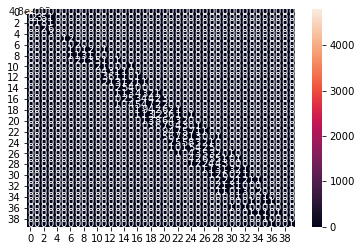

In [36]:
model_forest = RandomForestRegressor()
forest=model_forest.fit(Xtrain, ytrain)

ypred = forest.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

seaborn.heatmap(cnf_matrix, annot=True)

## Only QB DATA TRAINING

In [37]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)

df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)

df_nfl_players_stats.drop(columns=["game_date"], inplace=True)

df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

In [39]:
df_qb = df_nfl_players_stats[df_nfl_players_stats["pos"]=="QB"]

In [40]:
df_qb

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,26,45,228,0,1,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,23,39,186,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,25,38,239,0,1,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,14,24,248,3,0,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,14,18,180,1,2,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,15,20,178,3,0,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,14,37,128,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,0,1,0,0,0,...,0,0,6,9,6,26,False,42,53,7


In [41]:
Y = np.asarray(df_qb["pass_cmp"])
df_qb.drop(columns=["pass_cmp"], inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df_qb

,game_id,player_id,pos,player,team,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,30,203,1,0,5,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,45,228,0,1,5,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,39,186,1,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,38,239,0,1,3,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,24,248,3,0,4,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,18,180,1,2,3,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,20,178,3,0,4,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,37,128,1,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,1,0,0,0,0,...,0,0,6,9,6,26,False,42,53,7


In [43]:
X = np.asarray(df_qb.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

In [45]:
model = tf.keras.Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=64, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=16, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(Xtrain, ytrain ,batch_size = 10, epochs = 50, verbose=1)

Epoch 1/50
211/211 [==============================] - 0s 703us/step - loss: 346.3321
Epoch 2/50
211/211 [==============================] - 0s 660us/step - loss: 241.3680
Epoch 3/50
211/211 [==============================] - 0s 673us/step - loss: 169.9371
Epoch 4/50
211/211 [==============================] - 0s 661us/step - loss: 119.4965
Epoch 5/50
211/211 [==============================] - 0s 682us/step - loss: 84.7056
Epoch 6/50
211/211 [==============================] - 0s 651us/step - loss: 60.9206
Epoch 7/50
211/211 [==============================] - 0s 646us/step - loss: 44.7564
Epoch 8/50
211/211 [==============================] - 0s 651us/step - loss: 34.1685
Epoch 9/50
211/211 [==============================] - 0s 666us/step - loss: 26.7848
Epoch 10/50
211/211 [==============================] - 0s 664us/step - loss: 21.6505
Epoch 11/50
211/211 [==============================] - 0s 679us/step - loss: 17.8299
Epoch 12/50
211/211 [==============================] - 0s 674us/step -

In [46]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude


epochs = 20


end_step = np.ceil(1.0 * len(Xtrain) / 16).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.8,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = 'acc')

C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\Users\carlo\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


In [48]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]
model_for_pruning.fit(Xtrain, ytrain,batch_size=16,epochs=20, validation_split=.2)

Epoch 1/20
106/106 [==============================] - 0s 2ms/step - loss: 9.1974 - acc: 0.0922 - val_loss: 61.1565 - val_acc: 0.0831
Epoch 2/20
106/106 [==============================] - 0s 1ms/step - loss: 44.6229 - acc: 0.0725 - val_loss: 40.9913 - val_acc: 0.0190
Epoch 3/20
106/106 [==============================] - 0s 1ms/step - loss: 36.0816 - acc: 0.0815 - val_loss: 33.4663 - val_acc: 0.0879
Epoch 4/20
106/106 [==============================] - 0s 1ms/step - loss: 34.6739 - acc: 0.0731 - val_loss: 45.6774 - val_acc: 0.0119
Epoch 5/20
106/106 [==============================] - 0s 1ms/step - loss: 41.8893 - acc: 0.0553 - val_loss: 38.9740 - val_acc: 0.0784
Epoch 6/20
106/106 [==============================] - 0s 1ms/step - loss: 44.7925 - acc: 0.0820 - val_loss: 56.0653 - val_acc: 0.0831
Epoch 7/20
106/106 [==============================] - 0s 1ms/step - loss: 51.7132 - acc: 0.0779 - val_loss: 48.0417 - val_acc: 0.0855
Epoch 8/20
106/106 [==============================] - 0s 1ms/st

In [49]:
prunned = model_for_pruning.predict(Xtest)

yp_val =[math.floor(i) for i in prunned]

cnf_matrix_p = confusion_matrix(ytest,yp_val)
print(cnf_matrix_p)
print(classification_report(ytest,yp_val))

[[ 0  0  0 ...  0  0  0]
 [14 18  0 ...  0  0  0]
 [ 0  7  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.72      0.56      0.63        32
           1       0.29      0.42      0.34        12
           2       0.50      0.29      0.36        14
           3       0.71      0.38      0.50        13
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         9
           6       0.20      0.25      0.22         4
           7       0.10      1.00      0.18         1
           8       0.40      0.33      0.36         6
           9       0.33      0.25      0.29         4
          10       0.17      0.33      0.22         3
          11       0.25      0.36      0.30        11
          12       0.00      0.00      0.00         7
          13       0.60      0.20

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [50]:
Xtest[2]

array([ 30.  , 147.  ,   1.  ,   0.  ,   0.  ,   0.  ,  25.  ,  89.2 ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,  30.  ,  30.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   9.88,   9.88,   9.88,
         9.88,   9.88,   9.88, 204.  ,   2.  ,   6.  ,   5.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  56.  , 100.  ,  16.  ,
        14.  ,   0.  ,  40.  ,  47.  ,   8.  ], dtype=float32)

In [51]:
yp_val

[17,
 14,
 17,
 16,
 17,
 6,
 17,
 17,
 17,
 16,
 17,
 16,
 17,
 17,
 17,
 10,
 17,
 0,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 17,
 16,
 17,
 14,
 17,
 17,
 17,
 2,
 17,
 17,
 17,
 15,
 17,
 17,
 17,
 -1,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 -1,
 15,
 17,
 17,
 11,
 17,
 17,
 17,
 17,
 3,
 17,
 17,
 0,
 11,
 17,
 17,
 2,
 17,
 17,
 17,
 3,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 7,
 6,
 17,
 17,
 14,
 17,
 17,
 17,
 -1,
 0,
 17,
 16,
 17,
 16,
 17,
 2,
 17,
 7,
 17,
 17,
 17,
 17,
 4,
 17,
 11,
 0,
 17,
 0,
 17,
 7,
 17,
 16,
 8,
 13,
 0,
 17,
 17,
 17,
 17,
 17,
 15,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 -1,
 16,
 17,
 17,
 16,
 17,
 17,
 -1,
 17,
 17,
 11,
 -1,
 17,
 2,
 0,
 11,
 15,
 17,
 17,
 17,
 16,
 17,
 17,
 17,
 17,
 14,
 17,
 17,
 17,
 17,
 17,
 2,
 1,
 5,
 17,
 16,
 17,
 17,
 17,
 17,
 1,
 11,
 17,
 17,
 17,
 17,
 17,
 11,
 16,
 10,
 16,
 17,
 17,
 17,
 1,
 12,
 17,
 0,
 5,
 11,
 17,
 17,
 17,
 17,
 2,
 17,
 17,
 14,
 17,
 17,
 12,
 1,
 15,
 14,
 17,
 17,
 4,
 16,
 17,


[[32  0  0 ...  0  0  0]
 [ 0 10  2 ...  0  0  0]
 [ 0  2  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.83      0.83      0.83        12
           2       0.60      0.64      0.62        14
           3       0.75      0.46      0.57        13
           4       0.00      0.00      0.00         2
           5       0.50      0.44      0.47         9
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         1
           8       0.38      0.50      0.43         6
           9       0.17      0.25      0.20         4
          10       0.00      0.00      0.00         3
          11       0.33      0.09      0.14        11
          12       0.17      0.14      0.15         7
          13       0.31      0.27      0.29        15
          14       0.27      0.33

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

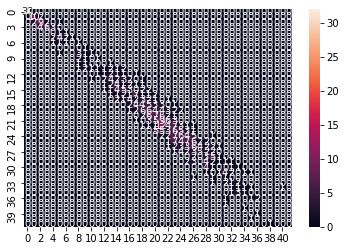

In [52]:
model_forest = RandomForestRegressor()
forest=model_forest.fit(Xtrain, ytrain)

ypred = forest.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

seaborn.heatmap(cnf_matrix, annot=True)

## Receiver Stats Training 
### WR / TE / RB

In [68]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)
df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)
df_nfl_players_stats.drop(columns=["game_date"], inplace=True)
df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [69]:
df_receiver = df_nfl_players_stats.copy()
df_receiver= df_receiver[df_receiver["pos"].isin(["WR", "TE", "RB"])]

In [62]:
df_receiver

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,1,0,37,61,10,3,False,65,69,10
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,2,0,41,67,10,3,False,65,69,10
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,19,0,59,97,10,3,False,65,69,10
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,17,0,33,54,10,3,False,65,69,10
5,201909050chi,DaviTr03,WR,Trevor Davis,GNB,0,0,0,0,0,...,10,0,17,28,10,3,False,65,69,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,6,0,46,70,6,26,False,42,53,7
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,0,0,12,18,6,26,False,42,53,7
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,1,0,35,53,6,26,False,42,53,7
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,0,0,3,5,6,26,False,42,53,7


In [70]:
Y = np.asarray(df_receiver["rec"])
df_receiver.drop(columns=["rec"], inplace=True)

X = np.asarray(df_receiver.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

[[1460    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   1  857   66    2    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   10  561   60    3    0    0    0    0    0    0    0    0    0
     0]
 [   0    0   13  399   58   11    0    1    0    0    0    0    0    0
     0]
 [   0    0    0   40  302   47    4    0    0    0    0    0    0    0
     0]
 [   0    0    0    2   47  167   37    4    0    1    0    0    0    0
     0]
 [   0    0    0    0    0   41   77   23    3    1    0    0    0    0
     0]
 [   0    0    0    0    0    1   33   58   11    2    1    0    0    0
     0]
 [   0    0    0    0    0    0    1   21   31   10    1    0    0    0
     0]
 [   0    0    0    0    0    0    0    1   20   16    1    1    0    0
     0]
 [   0    0    0    0    0    0    0    0    2   12    7    2    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    7    6    3    0    0
     0]
 [   0    0    0    0    0    0    0    

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

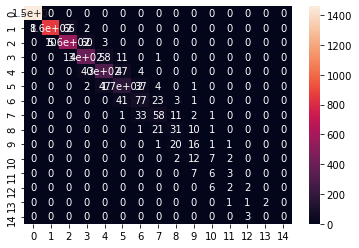

In [73]:
model_receiver = RandomForestRegressor()
forest_receiver=model_receiver.fit(Xtrain, ytrain)

ypred = forest_receiver.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

seaborn.heatmap(cnf_matrix, annot=True)

In [74]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)
df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)
df_nfl_players_stats.drop(columns=["game_date"], inplace=True)
df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)
df_receiver_all = df_nfl_players_stats.copy()

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
Y = np.asarray(df_receiver_all["rec"])
df_receiver_all.drop(columns=["rec"], inplace=True)

X = np.asarray(df_receiver_all.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

In [76]:
model_receiver_all = RandomForestRegressor()
forest_receiver_all=model_receiver_all.fit(Xtrain, ytrain)

ypred = forest_receiver_all.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

[[2110    1    1    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1  884   57    1    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   13  579   74    4    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    1   22  404   67    5    0    1    0    0    0    0    0    0
     0    0]
 [   0    0    0   33  318   54    1    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    1   42  148   28    2    0    1    0    0    0    0
     0    0]
 [   0    0    0    0    1   45  117   26    7    1    0    0    0    0
     0    0]
 [   0    0    0    0    0    0   26   43   12    7    1    0    0    0
     0    0]
 [   0    0    0    0    0    0    3   28   42   11    2    1    0    0
     0    0]
 [   0    0    0    0    0    0    0    1   13   16    7    1    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    3   15    7    2    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    2    8    4    

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
importances = forest_receiver_all.feature_importances_

In [79]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [90]:
index = list(df_receiver_all.columns)
del index[:5]

In [91]:
print(index)

['pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds', 'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td', 'rush_long', 'targets', 'rec_yds', 'rec_td', 'rec_long', 'fumbles_lost', 'rush_scrambles', 'designed_rush_att', 'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play', 'two_point_conv', 'total_ret_td', 'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus', 'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP', 'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws', 'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac', 'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense', 'off_pct', 'vis_score', 'home_score', 'OT', 'Temperature', 'Humidity', 'Wind_Speed']


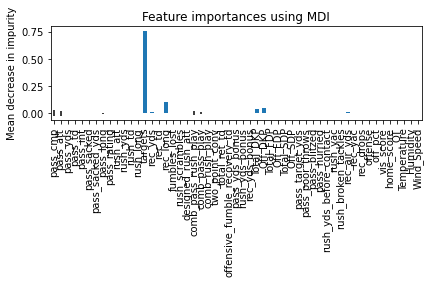

In [92]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=index)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [93]:
importances

array([9.35691250e-06, 1.29263783e-05, 7.39107396e-06, 4.65888208e-06,
       3.48017210e-06, 4.85048749e-06, 4.40040796e-06, 1.28471265e-05,
       1.99418380e-05, 2.03724465e-04, 7.46189103e-04, 1.11149519e-04,
       6.58253883e-04, 7.61646870e-01, 9.97724757e-03, 1.98017703e-03,
       1.03230322e-01, 1.65321838e-04, 0.00000000e+00, 2.07752111e-04,
       2.43326925e-04, 1.39277346e-05, 2.07485211e-04, 1.64542956e-04,
       1.15677501e-06, 3.06971911e-06, 7.35112898e-07, 8.93756007e-06,
       6.19591909e-05, 3.91213506e-02, 4.66693577e-02, 1.07170356e-03,
       1.11014552e-03, 1.25324324e-03, 1.28239443e-03, 2.01674791e-05,
       4.73022760e-06, 6.18817465e-06, 4.88808832e-06, 7.46504411e-04,
       5.40697007e-04, 1.53487790e-04, 1.08419872e-02, 5.38720294e-03,
       3.02006141e-03, 1.34094318e-03, 1.40020419e-03, 1.43779563e-03,
       1.58723921e-03, 1.67611550e-04, 1.05043374e-03, 1.15816570e-03,
       9.11495076e-04])

In [96]:
df_nfl_players_stats

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,0,0,61,100,10,3,False,65,69,10
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,1,0,37,61,10,3,False,65,69,10
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,2,0,41,67,10,3,False,65,69,10
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,19,0,59,97,10,3,False,65,69,10
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,17,0,33,54,10,3,False,65,69,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,6,0,46,70,6,26,False,42,53,7
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,0,0,12,18,6,26,False,42,53,7
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,1,0,35,53,6,26,False,42,53,7
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,0,0,3,5,6,26,False,42,53,7


In [97]:
copy = df_nfl_players_stats.copy()

In [ ]:
for i in copy:
    

In [ ]:
model = tf.keras.Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=64, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=16, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(Xtrain, ytrain ,batch_size = 10, epochs = 50, verbose=1)